# Setup
Clone GitHub [repository](https://github.com/ultralytics/ultralytics), install ultralytics and imoprt YOLO.

In [1]:
!git clone https://github.com/ultralytics/ultralytics  # clone
%cd ultralytics
%pip install -e ultralytics
!pip install opencv-python-headless
!pip install py-cpuinfo

Cloning into 'ultralytics'...
remote: Enumerating objects: 23694, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 23694 (delta 111), reused 126 (delta 57), pack-reused 23476
Receiving objects: 100% (23694/23694), 13.95 MiB | 27.84 MiB/s, done.
Resolving deltas: 100% (16606/16606), done.
/opt/app-root/src/safari-demo/notebooks/ultralytics


/opt/app-root/lib64/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Obtaining file:///opt/app-root/src/safari-demo/notebooks/ultralytics/ultralytics
ERROR: file:///opt/app-root/src/safari-demo/notebooks/ultralytics/ultralytics does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
from PIL import Image

# Data preparation
Data preparation is usually a big task. You might have to clean, label and format data into training and test data sets. 

We combined a [pre-labeled dataset](https://universe.roboflow.com/other-pokemon-datasets/pokemon-pictures/) from RoboFlow and manually labeled data to create our training and testing data sets. Lucky for you, you just need to Unzip the images and annotations.

**Unzip the images and annotations:**

In [4]:
!ls -l /opt/app-root/src/safari-demo/dataset/*

-rw-r--r--. 1 1000740000 1000740000 940 Mar 28 23:43 /opt/app-root/src/safari-demo/dataset/data.yaml

/opt/app-root/src/safari-demo/dataset/test:
total 696
drwxr-sr-x. 2 1000740000 1000740000 278528 Mar 28 23:44 images
drwxr-sr-x. 2 1000740000 1000740000 278528 Mar 28 23:44 labels

/opt/app-root/src/safari-demo/dataset/train:
total 2340
drwxr-sr-x. 2 1000740000 1000740000 851968 Mar 28 23:44 images
drwxr-sr-x. 2 1000740000 1000740000 999424 Mar 28 23:44 labels


# Start model training
Train a YOLOv8m model on the metal-nut data by specifying dataset, batch-size, image size and pretrained --weights yolov8m.pt. Pretrained weights are auto-downloaded from the latest [YOLOv8 release](https://github.com/ultralytics/ultralytics). Some of the output was removed so you don't have to doom scroll through epochs.

In [ ]:
# Load a model
model = YOLO("/opt/app-root/src/ultralytics/runs/detect/train/weights/last.pt")  # load a pretrained model (recommended for training)
model.train(data='/opt/app-root/src/safari-demo/dataset/data.yaml', epochs=300, imgsz=640, batch=16)

New https://pypi.org/project/ultralytics/8.1.37 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.36 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (Tesla M60, 8124MiB)
engine/trainer: task=detect, mode=train, model=/opt/app-root/src/ultralytics/runs/detect/train/weights/last.pt, data=/opt/app-root/src/safari-demo/dataset/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_n

train: Scanning /opt/app-root/src/safari-demo/dataset/train/labels.cache... 19192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19192/19192 [00:00<?, ?it/s]

train: WARNING ⚠️ /opt/app-root/src/safari-demo/dataset/train/images/Giraffe_326b9a3496142b2e.jpg: 1 duplicate labels removed



val: Scanning /opt/app-root/src/safari-demo/dataset/test/labels.cache... 6505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6505/6505 [00:00<?, ?it/s]


No module named 'seaborn'
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /opt/app-root/src/ultralytics/runs/detect/train2
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      7.61G     0.6766     0.7533       1.17         18        640: 100%|██████████| 1200/1200 [31:17<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.508      0.575      0.563      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      7.33G     0.6917     0.7723      1.172         16        640: 100%|██████████| 1200/1200 [31:05<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.504      0.552      0.546      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      7.34G     0.7338     0.8679      1.197         13        640: 100%|██████████| 1200/1200 [31:02<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.511      0.507      0.523      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      7.32G     0.7824      1.004       1.23         12        640: 100%|██████████| 1200/1200 [31:00<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576       0.48      0.529      0.513      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      7.32G     0.7907       1.04       1.24         22        640: 100%|██████████| 1200/1200 [31:00<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.487      0.494      0.498      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      7.31G     0.7903      1.047      1.237         19        640: 100%|██████████| 1200/1200 [31:00<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.513      0.478      0.508      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      7.31G     0.7958       1.06      1.241         16        640: 100%|██████████| 1200/1200 [31:00<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.478      0.518      0.507      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300       7.3G     0.7895      1.056      1.242         39        640: 100%|██████████| 1200/1200 [30:59<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.04it/s]


                   all       6505       7576      0.516      0.493      0.507      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      7.38G     0.7953      1.055      1.243         17        640: 100%|██████████| 1200/1200 [30:59<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576       0.49      0.518      0.516      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      7.35G     0.7866      1.052      1.235         22        640: 100%|██████████| 1200/1200 [30:59<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.467      0.524      0.504      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      7.34G     0.7952      1.043      1.243         31        640: 100%|██████████| 1200/1200 [30:59<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.05it/s]


                   all       6505       7576      0.514        0.5      0.516      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300       7.3G     0.7907      1.044      1.238         20        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.475      0.538      0.519      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      7.33G     0.7836      1.043       1.24         22        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.04it/s]


                   all       6505       7576      0.526      0.492      0.511       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      7.31G     0.7898      1.043      1.237         22        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.507      0.516      0.521       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300       7.3G     0.7844      1.029       1.24         23        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576       0.49       0.53      0.527      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      7.31G     0.7829       1.02      1.232         17        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.04it/s]


                   all       6505       7576      0.505      0.521      0.525      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      7.35G     0.7805      1.027      1.232         29        640: 100%|██████████| 1200/1200 [31:00<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.505      0.518      0.532      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      7.34G     0.7855      1.023      1.235         15        640: 100%|██████████| 1200/1200 [31:00<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.494      0.544      0.532      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      7.31G     0.7809      1.007       1.23         16        640: 100%|██████████| 1200/1200 [30:59<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.499      0.543       0.54      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      7.32G     0.7835      1.016      1.234         22        640: 100%|██████████| 1200/1200 [30:59<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.498      0.554      0.538      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      7.31G     0.7803       1.01      1.233         26        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.504      0.536      0.541      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      7.34G     0.7768      1.006      1.228         23        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.04it/s]


                   all       6505       7576      0.498      0.543       0.54      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      7.34G     0.7791      1.008      1.233         30        640: 100%|██████████| 1200/1200 [30:59<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.05it/s]


                   all       6505       7576      0.498      0.546      0.539      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300       7.3G     0.7815      0.992      1.231         21        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.511       0.55       0.54      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      7.31G     0.7817     0.9955      1.232         25        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.494      0.556      0.551      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      7.33G     0.7748      0.988      1.227         25        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.05it/s]


                   all       6505       7576      0.534      0.542       0.55      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300       7.3G     0.7723      0.988      1.223         18        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.495      0.571      0.553      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      7.34G     0.7719     0.9835      1.226         17        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.532      0.545      0.554      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      7.36G     0.7726      0.984      1.225         16        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.05it/s]


                   all       6505       7576      0.511      0.553      0.554      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      7.33G     0.7657     0.9716      1.224         20        640: 100%|██████████| 1200/1200 [30:59<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.506      0.566      0.554      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      7.34G     0.7725     0.9765      1.224         20        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.499      0.567      0.556      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      7.36G     0.7667     0.9674      1.222         17        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.04it/s]


                   all       6505       7576      0.491      0.571      0.557      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      7.32G     0.7643      0.972      1.219         19        640: 100%|██████████| 1200/1200 [30:59<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.513      0.558      0.555      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      7.35G     0.7656     0.9668      1.223         17        640: 100%|██████████| 1200/1200 [31:00<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.524      0.553      0.559      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      7.29G     0.7628     0.9623      1.219         27        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.505      0.572      0.555      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300       7.3G     0.7644     0.9607      1.219         21        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.489      0.576      0.557      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      7.32G     0.7651     0.9527      1.219         17        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.509      0.572      0.558      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      7.33G      0.761     0.9552      1.219         17        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.502      0.576      0.557      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      7.34G     0.7664     0.9496      1.218         22        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.502      0.575      0.559      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300       7.3G      0.765     0.9453      1.218         19        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.502      0.579      0.559      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      7.33G     0.7607     0.9443      1.217         23        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.06it/s]


                   all       6505       7576      0.506      0.574      0.559      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      7.31G     0.7516     0.9381      1.212         20        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.499      0.576      0.559       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      7.32G     0.7566     0.9372      1.213         23        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.514      0.559      0.557      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      7.34G     0.7579     0.9384      1.217         24        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.515      0.562      0.558       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      7.31G     0.7554     0.9334      1.213         28        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.512      0.568       0.56      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300       7.3G     0.7537     0.9328      1.213         20        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.493      0.586      0.561      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300       7.3G      0.753     0.9289      1.211         21        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]


                   all       6505       7576      0.499      0.585      0.562      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      7.31G     0.7542     0.9224      1.209         19        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.486      0.598      0.563      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      7.34G     0.7504     0.9192      1.208         24        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.487      0.598      0.562      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      7.33G     0.7495     0.9307      1.212         28        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.487      0.599      0.564      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      7.34G     0.7525     0.9242      1.214         22        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.488      0.597      0.565      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      7.34G      0.749     0.9121      1.206         31        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.496      0.587      0.565      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      7.31G     0.7531     0.9252      1.213         15        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]


                   all       6505       7576      0.503      0.585      0.566      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      7.35G     0.7492     0.9187      1.208         25        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.503      0.585      0.567      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      7.34G      0.744     0.9107      1.207         27        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.507      0.582      0.567      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300       7.3G      0.752     0.9144      1.213         20        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]

                   all       6505       7576      0.505      0.584      0.567      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      7.34G     0.7519     0.9111       1.21         14        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.06it/s]

                   all       6505       7576      0.506       0.58      0.566      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      7.33G     0.7482     0.9044      1.208         24        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]

                   all       6505       7576        0.5      0.585      0.566      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      7.33G     0.7496     0.8991      1.206         25        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.04it/s]


                   all       6505       7576      0.501      0.584      0.566      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      7.33G     0.7441     0.9047      1.205         17        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.529      0.555      0.566      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300       7.3G      0.747     0.9023      1.205         20        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.503      0.579      0.566      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      7.34G     0.7484      0.912      1.209         29        640: 100%|██████████| 1200/1200 [30:56<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]

                   all       6505       7576      0.514      0.566      0.566      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      7.32G     0.7437     0.8966      1.205         37        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.494      0.586      0.566      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      7.35G     0.7435     0.8939      1.208         21        640: 100%|██████████| 1200/1200 [30:58<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.06it/s]

                   all       6505       7576      0.511      0.569      0.566      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      7.31G     0.7403     0.8935      1.204         24        640: 100%|██████████| 1200/1200 [30:56<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.512      0.567      0.566      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      7.31G     0.7399     0.8942      1.202         27        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]

                   all       6505       7576      0.529      0.553      0.566      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      7.33G     0.7353     0.8877      1.202         13        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.06it/s]

                   all       6505       7576      0.524      0.556      0.565      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      7.34G     0.7408     0.8909      1.205         18        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.06it/s]


                   all       6505       7576      0.512      0.566      0.565      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      7.33G      0.744     0.8879        1.2         18        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.06it/s]

                   all       6505       7576      0.515      0.564      0.565      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      7.34G     0.7403     0.8928      1.202         18        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.521      0.562      0.565      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300       7.3G     0.7337     0.8777        1.2         23        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:15<00:00,  1.05it/s]

                   all       6505       7576      0.521      0.562      0.564      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      7.35G     0.7431     0.8837      1.203         19        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.519      0.562      0.564      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      7.31G      0.736     0.8845      1.198         19        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:13<00:00,  1.05it/s]

                   all       6505       7576      0.516      0.565      0.565      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      7.31G     0.7401     0.8781      1.202         18        640: 100%|██████████| 1200/1200 [30:57<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 204/204 [03:14<00:00,  1.05it/s]

                   all       6505       7576      0.518      0.564      0.565      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      7.31G     0.7308     0.8861      1.202         42        640:  71%|███████   | 849/1200 [21:54<09:02,  1.55s/it]

# Validation

Now that we have our model, we can made predictions with new images. We have some images for you to try out in *pokedex-demo/database/Predictions*. For this example, we'll predict *pokemon5.png*

In [8]:
# Load a model
model = YOLO('/opt/app-root/src/ultralytics/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model
results = model('/opt/app-root/src/safari-demo/dataset/test/images/Bear_0df78ee76bafd3a9.jpg', save=True)  # predict on an image


image 1/1 /opt/app-root/src/safari-demo/dataset/test/images/Bear_0df78ee76bafd3a9.jpg: 640x640 1 Bear, 61.0ms
Speed: 2.3ms preprocess, 61.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /opt/app-root/src/ultralytics/runs/detect/predict


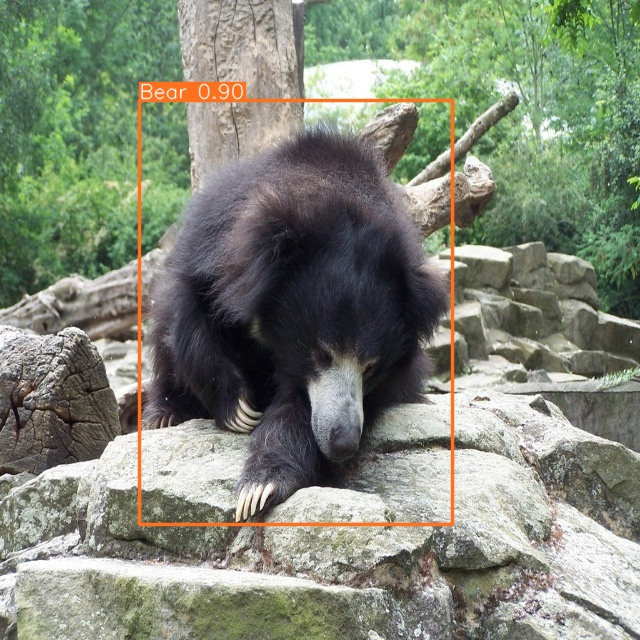

In [9]:
# View image 
Image.open('/opt/app-root/src/ultralytics/runs/detect/predict/Bear_0df78ee76bafd3a9.jpg')

# Export 
Finally, we're going to export our file in ONNX format so we can use it in our application. Make sure to change the path to correspond with where your weights are saved.

In [10]:
model.export(format='onnx')

Ultralytics YOLOv8.1.36 🚀 Python-3.9.18 torch-2.0.1+cu118 CPU (Intel Xeon Silver 4116 2.10GHz)

PyTorch: starting from '/opt/app-root/src/ultralytics/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (198.3 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 10.0s, saved as '/opt/app-root/src/ultralytics/runs/detect/train/weights/best.onnx' (99.0 MB)

Export complete (14.9s)
Results saved to /opt/app-root/src/ultralytics/runs/detect/train/weights
Predict:         yolo predict task=detect model=/opt/app-root/src/ultralytics/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/opt/app-root/src/ultralytics/runs/detect/train/weights/best.onnx imgsz=640 data=/opt/app-ro

'/opt/app-root/src/ultralytics/runs/detect/train/weights/best.onnx'

# Next
Now that we have exported our model, let's head back to [the pokedex repository](https://github.com/OpenShiftDemos/pokedex-demo/blob/main/docs/deploy_microshift.md) to deploy our Pokedex application using MicroShift. 



# Extra Fun: Video Recognition
If you want to do one more prediction, let's make some with a video.

In [ ]:
# Predict with the model
results = model('/opt/app-root/src/pokedex-demo/database/test/videos/safari.mp4', save=True, imgsz=640)  # predict on a video -  conf=0.5